# Задачи классификации и кластеризации

**Домашнее задание к лекции «Задачи классификации и кластеризации»**

Задание.

    Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
    Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
    Разделите данные на выборку для обучения и тестирования
    Постройте модель LDA
    Визуализируйте предсказания для тестовой выборки и центры классов
    Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
    Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию



In [51]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# загружаем данные по ирисам в виде Bunch-словаря
# https://pythonru.com/primery/sklearn-datasets?ysclid=ldfqsp0k60993772623

iris = load_iris()
type(iris)
# Ключи bunch -словаря 
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


**data** — это необходимые для предсказания данные (показатели, полученные при сканировании, такие как радиус, площадь и другие) в массиве NumPy.

**target** — это целевые данные (переменная, которую вы хотите предсказать) в массиве NumPy.

**Описание тестового массива данных:**

In [53]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [54]:
# загружаем данные в датафрейм
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# загружаем ответы в массив Numpy
data_class = iris.target


In [55]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Оставьте два признака - **sepal_length** и **sepal_width** и целевую переменную - **variety**:

In [57]:
# оставим только нужные столбцы:
df = df[['sepal length (cm)', 'sepal width (cm)']]
# и переименуем их:
df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [58]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data_class, random_state=42)

In [59]:
X_train

,sepal_length,sepal_width
4,5.0,3.6
32,5.2,4.1
142,5.8,2.7
85,6.0,3.4
86,6.7,3.1
...,...,...
71,6.1,2.8
106,4.9,2.5
14,5.8,4.0
92,5.8,2.6


In [60]:
print('Размер тренировочной выборки:',len(y_train))

Размер тренировочной выборки: 112


In [61]:
print('Размер тестовой выборки:',len(y_test))

Размер тестовой выборки: 38


In [62]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [63]:
# создадим экзмпляр объёкта модели:
lda = LinearDiscriminantAnalysis()

In [64]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [65]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [66]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [67]:
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [68]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [69]:
print(f'Точность модели: {accuracy_score(y_test, y_pred):0.2f}')

Точность модели: 0.87


In [70]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

In [71]:
X_train

,sepal_length,sepal_width
4,5.0,3.6
32,5.2,4.1
142,5.8,2.7
85,6.0,3.4
86,6.7,3.1
...,...,...
71,6.1,2.8
106,4.9,2.5
14,5.8,4.0
92,5.8,2.6


In [72]:
# визуализируем дискриминантные линии только по 2 признакам
# **sepal_length** и **sepal_width**
small_train = X_train[['sepal_length', 'sepal_width']]
small_test = X_test[['sepal_length', 'sepal_width']]

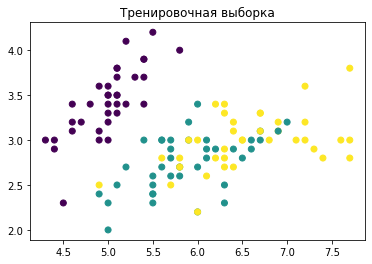

In [73]:
plt.scatter(x=small_train['sepal_length'], y=small_train['sepal_width'], c=y_train)
plt.title('Тренировочная выборка')
plt.show()


In [74]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [75]:
# посмотрим на наши центроиды
lda_small.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

Text(0.5, 1.0, 'Тестовая выборка')

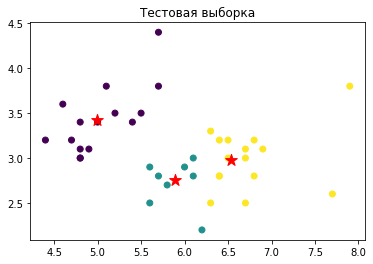

In [76]:
# сам scatter plot
plt.scatter(small_test['sepal_length'], small_test['sepal_width'], c=y_pred)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')
plt.title('Тестовая выборка')

In [77]:
# имеют значения признаки удалённости
lda_small.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

In [78]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

0.868421052631579

In [79]:
df[['sepal_length','sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


In [80]:
# заменим модель на логистическую регрессиию
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression()

In [82]:
lr.fit(X_train, y_train)

LogisticRegression()

**Предсказанное и реальное значение класса в логистической регрессии:**

In [83]:
y_pred = lr.predict(X_test)

In [84]:
for i in range(len(y_pred)):
    print(f'{i+1}. Предсказанное значение класса: {y_pred[i]} реальное значение класса: {y_test[i]}')

1. Предсказанное значение класса: 1 реальное значение класса: 1
2. Предсказанное значение класса: 0 реальное значение класса: 0
3. Предсказанное значение класса: 2 реальное значение класса: 2
4. Предсказанное значение класса: 1 реальное значение класса: 1
5. Предсказанное значение класса: 2 реальное значение класса: 1
6. Предсказанное значение класса: 0 реальное значение класса: 0
7. Предсказанное значение класса: 1 реальное значение класса: 1
8. Предсказанное значение класса: 2 реальное значение класса: 2
9. Предсказанное значение класса: 1 реальное значение класса: 1
10. Предсказанное значение класса: 1 реальное значение класса: 1
11. Предсказанное значение класса: 2 реальное значение класса: 2
12. Предсказанное значение класса: 0 реальное значение класса: 0
13. Предсказанное значение класса: 0 реальное значение класса: 0
14. Предсказанное значение класса: 0 реальное значение класса: 0
15. Предсказанное значение класса: 0 реальное значение класса: 0
16. Предсказанное значение класса:

In [85]:
print(f'Точность модели логистической регрессии: {accuracy_score(y_pred, y_test):0.2f}')

Точность модели логистической регрессии: 0.84


In [86]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(X_test)

array([[2.38318259e-02, 5.39569918e-01, 4.36598256e-01],
       [7.11056563e-01, 1.28646086e-01, 1.60297351e-01],
       [2.58701455e-05, 1.58881246e-01, 8.41092884e-01],
       [4.60276708e-02, 5.35393890e-01, 4.18578439e-01],
       [1.73706586e-03, 3.32783951e-01, 6.65478983e-01],
       [6.73659907e-01, 2.06738542e-01, 1.19601551e-01],
       [1.65740832e-01, 5.68996052e-01, 2.65263116e-01],
       [2.81452331e-03, 2.47752254e-01, 7.49433223e-01],
       [2.44866688e-03, 6.55794505e-01, 3.41756828e-01],
       [4.87774735e-02, 6.34411490e-01, 3.16811037e-01],
       [1.81738012e-02, 3.29110344e-01, 6.52715855e-01],
       [8.02288177e-01, 1.67231642e-01, 3.04801811e-02],
       [6.66531987e-01, 1.93443028e-01, 1.40024985e-01],
       [8.05101962e-01, 1.58704881e-01, 3.61931567e-02],
       [9.56340388e-01, 2.77423289e-02, 1.59172831e-02],
       [5.15333830e-02, 3.53390399e-01, 5.95076218e-01],
       [1.00587209e-02, 3.74906683e-01, 6.15034596e-01],
       [4.95500397e-02, 7.20598

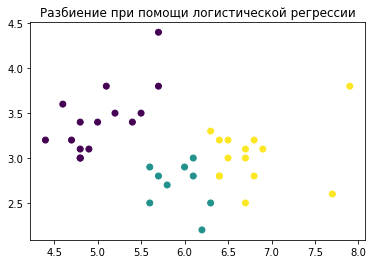

In [87]:
# сам scatter plot для логистической регрессии:
plt.title('Разбиение при помощи логистической регрессии')
plt.scatter(small_test['sepal_length'], small_test['sepal_width'], c=y_pred)

## Кластеризация

Отбросьте целевую переменную и оставьте только два признака - **sepal_length** и **sepal_width**
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [88]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


**Выполним масштабирование:**

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()

In [187]:
# fit-transform сразу обучается и преобразует данные датафрейм
X_scaled = scaler.fit_transform(df)
type(X_scaled)
for i in range(5):
    sepal_length = df.iloc[i]['sepal_length']
    sepal_width = df.iloc[i]['sepal_width']
    print( f'Исходные данные: sepal_length = {sepal_length} sepal_width = {sepal_width}, масштабированные данные:{X_scaled[i]}')

Исходные данные: sepal_length = 5.1 sepal_width = 3.5, масштабированные данные:[-0.90068117  1.01900435]
Исходные данные: sepal_length = 4.9 sepal_width = 3.0, масштабированные данные:[-1.14301691 -0.13197948]
Исходные данные: sepal_length = 4.7 sepal_width = 3.2, масштабированные данные:[-1.38535265  0.32841405]
Исходные данные: sepal_length = 4.6 sepal_width = 3.1, масштабированные данные:[-1.50652052  0.09821729]
Исходные данные: sepal_length = 5.0 sepal_width = 3.6, масштабированные данные:[-1.02184904  1.24920112]


**Подберём оптимальное число кластеров для алгоритма k-means через расчёт моментов инерции:**

In [92]:
from sklearn.cluster import KMeans

In [95]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 7)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

Text(0, 0.5, 'Инерция')

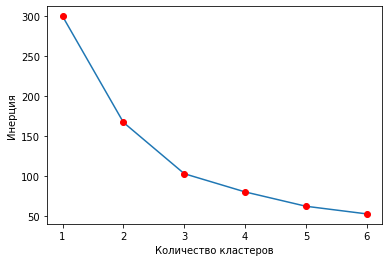

In [96]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

Визуально есть различия в моменте инерции максимум для **трёх классов**.

In [93]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

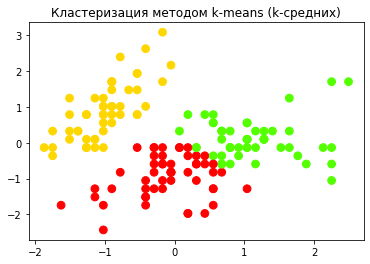

In [94]:
plt.title('Кластеризация методом k-means (k-средних)')
# https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='prism', c=clusters, s=60)

**Иерархическая кластеризация**

In [107]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import single, cophenet

Из документации по mathcad:

    ‘single’ – алгоритм ближайшего соседа;
    ‘complete’ – алгоритм дальнего соседа;
    ‘average’ – алгоритм средней связи;
    ‘centroid’ – центроидный метод – по центрам тяжести групп;
    ‘ward’ – пошаговый алгоритм.


**Оптимизируем иерархическиую кластеризацию по типу связи:**

In [189]:
# пробуем все виды алгоритмов:
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# типы алгоритмов формирования связей
link_type = ['single', 'complete', 'average', 'centroid', 'weighted', 'median', 'ward'] 
x_max = 0. # лучшая корреляция
metod_name = ''
x_lst=[] # запомнить коэффициенты корреляции
for link in link_type:
    Z = hierarchy.linkage(distance_mat, link)
    x, _ = cophenet(Z,distance_mat) # считаем коэффициент корреляции для иерархического кластерного дерева
    x_lst.append(x)
    if x > x_max:
        x_max = x
        Z_opt = Z
        metod_name = link
    print(f'Тип связи: {link} Качество разбиения: {x:.3f}')
    
print(f'Оптимальный тип связи: {metod_name} Качество разбиения: {x_max:.3f}') 


Тип связи: single Качество разбиения: 0.657
Тип связи: complete Качество разбиения: 0.575
Тип связи: average Качество разбиения: 0.739
Тип связи: centroid Качество разбиения: 0.737
Тип связи: weighted Качество разбиения: 0.697
Тип связи: median Качество разбиения: 0.541
Тип связи: ward Качество разбиения: 0.669
Оптимальный тип связи: average Качество разбиения: 0.739


**Вывод:** Формально для исследуемого  набора данных оптимальным  будет разбиение построенное на ***алгоритме средней связи***. Попытаемся его визуализировать: 

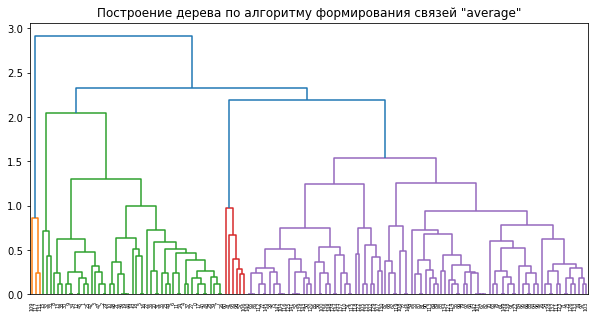

In [192]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1).set(title='Построение дерева по алгоритму формирования связей "average"')
dn = hierarchy.dendrogram(Z_opt)


**Вывод:** Получилось неудачно-кластеры явно неравномерны (см. оранжевое и красное объединение).

Построим все иерархические модели:

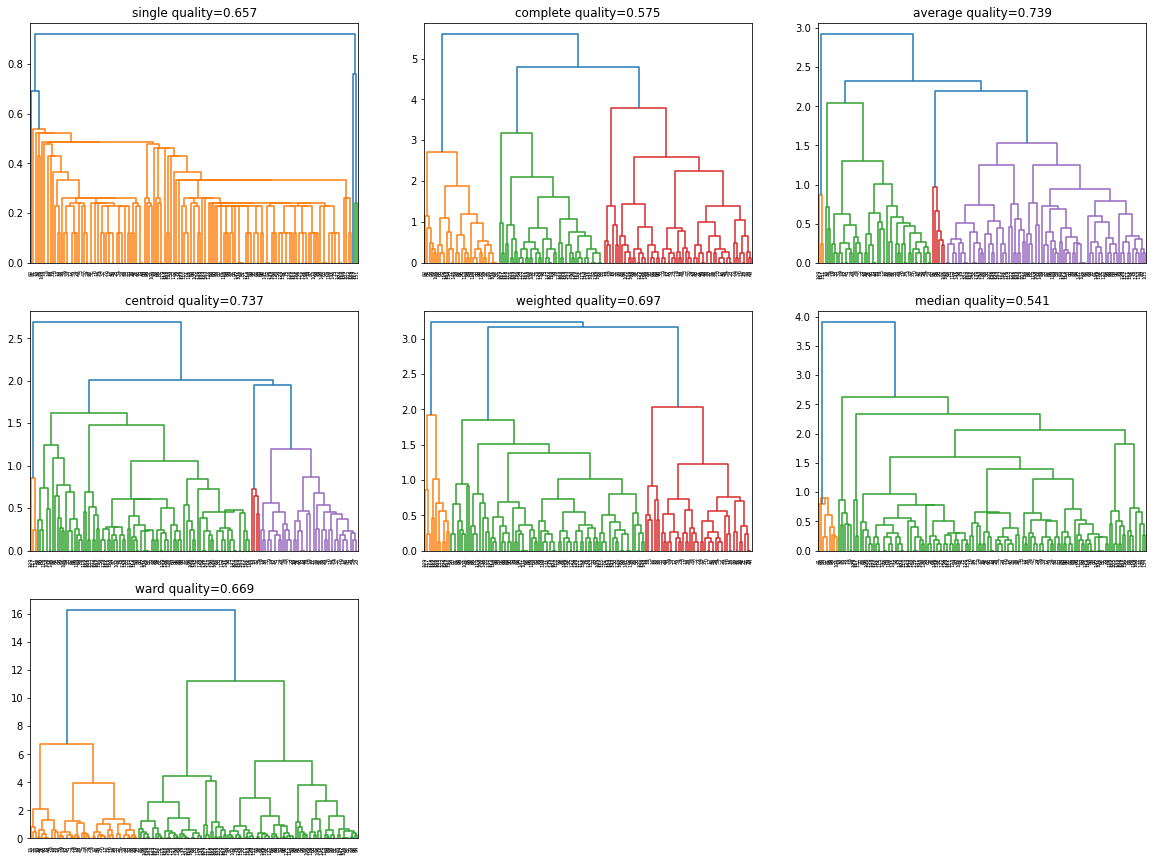

In [156]:
#['single', 'complete', 'average', 'centroid', 'weighted', 'median', 'ward']

distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками


plt.rcParams['figure.figsize'] = [20,15]

# Creating figure object
plt.figure()

for i in range(7):
    title_str = link_type[i]+' quality='+str(round(x_lst[i],3))
    plt.subplot(3,3,i+1).set(title=title_str)
    dn = hierarchy.dendrogram(hierarchy.linkage(distance_mat, link_type[i]))
 
plt.show()


**Выводы:** Субъективно лучшие результата показали методы с средним коэффициентом корелляции (quality)  - 'complete', 'weighted', 'ward', где явно выделяется по три кластера. Возможно высокий коэфициент коррелции говорит об излишней чувствительности модели.

**Агломеративная кластеризация c разными типами связи**

In [119]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [195]:
aglo_complete = AgglomerativeClustering(n_clusters=3,linkage='complete')
clusters_complete = aglo_complete.fit_predict(X_scaled)

aglo_ward = AgglomerativeClustering(n_clusters=3,linkage='ward')
clusters_ward = aglo_ward.fit_predict(X_scaled)

display(clusters_complete)
display(clusters_ward)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2,
       0, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0], dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

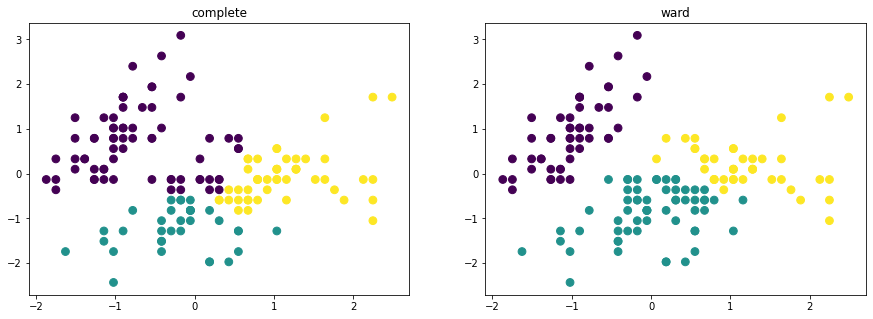

In [196]:
# построение разбиения
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1).set(title='complete')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_complete, s=60)
plt.subplot(1,2,2).set(title='ward')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_ward, s=60)

**Вывод:** В зависимости от типа алгоритма вычисления связей агломеративная кластеризация формирует различные объединения в кластеры.